In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


Reading results from: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results
--------------------------------------------------------------------------------
Model                          | L     | Test PEHE 
--------------------------------------------------------------------------------
TARNet (No Balance)            | 0     | 0.0037
TARNet + Balancing             | 0     | 0.0036
TARNet + Propensity            | 0     | 0.0536
TARNet + Dragon                | 0     | 0.0036
TARNet (No Balance)            | 1     | 1.3075
TARNet + Balancing             | 1     | 0.2930
TARNet + Propensity            | 1     | 0.9323
TARNet + Dragon                | 1     | 1.1978
TARNet (No Balance)            | 2     | 2.4225
TARNet + Balancing             | 2     | 0.4418
TARNet + Propensity            | 2     | 1.6801
TARNet + Dragon                | 2     | 2.3890
TARNet (No Balance)            | 4     | 3.9220
TARNet + Balancing             | 4     | 0.2875
TARNet + Propensity    

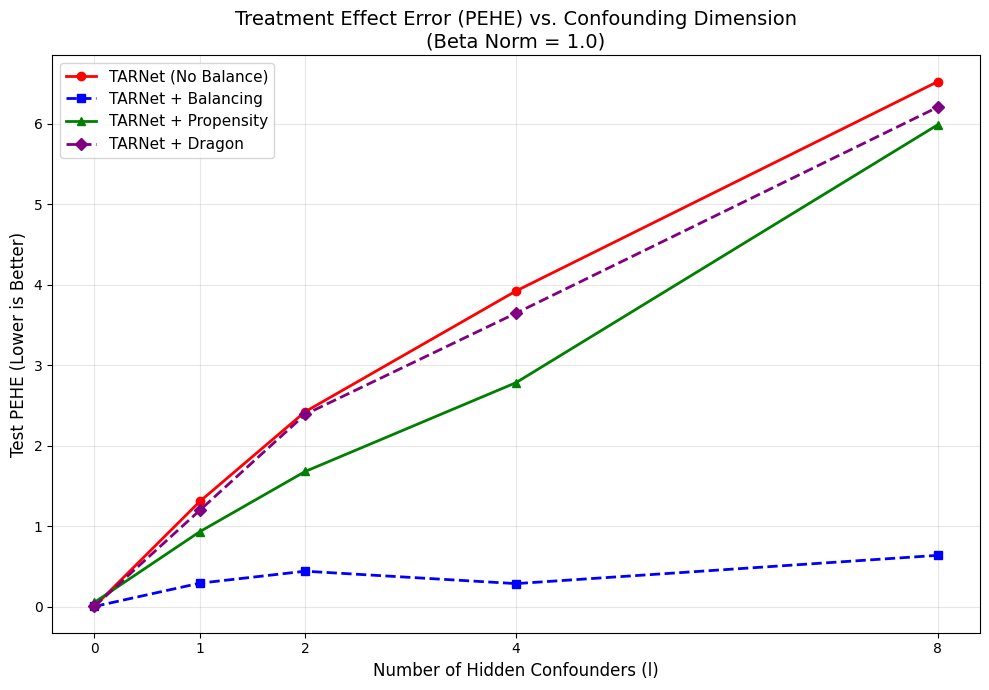

In [6]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# ==========================================
# Config
# ==========================================
# Update this to match your project path
RESULTS_DIR = "/content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results"

# The experiment parameters you ran
BETA_NORM = 1.0
L_LIST = [0, 1, 2, 4, 8]

# Models to compare
# Keys must match the 'model_type' used in your saved json files
MODELS = {
    "baseline": "TARNet (No Balance)",
    "baseline_bal": "TARNet + Balancing",
    "propensity": "TARNet + Propensity",
    "dragonnet": "TARNet + Dragon"
    # "propensity_bal": "TARNet + Propensity + Bal"
}

# ==========================================
# Data Loading
# ==========================================
plot_data = {m_key: {'l': [], 'pehe': []} for m_key in MODELS}

print(f"Reading results from: {RESULTS_DIR}")
print("-" * 80)
print(f"{'Model':<30} | {'L':<5} | {'Test PEHE':<10}")
print("-" * 80)

for l in L_LIST:
    for m_key, m_label in MODELS.items():
        # Construct filename matching main_train.py pattern
        # e.g., metrics_propensity_beta1.0_l4.json
        fname = f"metrics_{m_key}_beta{BETA_NORM}_l{l}.json"
        fpath = os.path.join(RESULTS_DIR, fname)

        if not os.path.exists(fpath):
            # Only print missing if it's strictly necessary to debug
            print(f"[{m_key}] Missing file: {fname}")
            continue

        try:
            with open(fpath, 'r') as f:
                results = json.load(f)

            # We use 'test_PEHE' as the final evaluation metric
            pehe = results.get("best_val_PEHE", np.nan)
            if m_key == 'dragonnet':
               pehe = results.get("val_PEHE", np.nan)


            plot_data[m_key]['l'].append(l)
            plot_data[m_key]['pehe'].append(pehe)

            print(f"{m_label:<30} | {l:<5} | {pehe:.4f}")

        except Exception as e:
            print(f"Error reading {fname}: {e}")

# ==========================================
# Plotting
# ==========================================
plt.figure(figsize=(10, 7))

# Define styles for clear distinction
colors = {
    "baseline": "red",
    "baseline_bal": "blue",
    "propensity": "green",
    "dragonnet": "purple",
    "propensity_bal": "purple"
}

markers = {
    "baseline": "o",       # Circle
    "baseline_bal": "s",   # Square
    "propensity": "^",     # Triangle Up
    "dragonnet": "D",  # Diamond
    "propensity_bal": "D"  # Diamond
}

linestyles = {
    "baseline": "-",
    "baseline_bal": "--",
    "propensity": "-",
    "dragonnet": "--",
    "propensity_bal": "--"
}

for m_key, m_label in MODELS.items():
    x = plot_data[m_key]['l']
    y = plot_data[m_key]['pehe']

    if len(x) > 0:
        plt.plot(x, y,
                 marker=markers.get(m_key, 'o'),
                 color=colors.get(m_key, 'black'),
                 linestyle=linestyles.get(m_key, '-'),
                 linewidth=2,
                 label=m_label)

plt.title(f"Treatment Effect Error (PEHE) vs. Confounding Dimension\n(Beta Norm = {BETA_NORM})", fontsize=14)
plt.xlabel("Number of Hidden Confounders (l)", fontsize=12)
plt.ylabel("Test PEHE (Lower is Better)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Force integer ticks on x-axis
plt.xticks(L_LIST)

plt.tight_layout()
plt.show()

Generating plots for Betas: [0.5, 1.0, 2.0, 4.0]...
Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_beta0.5.png


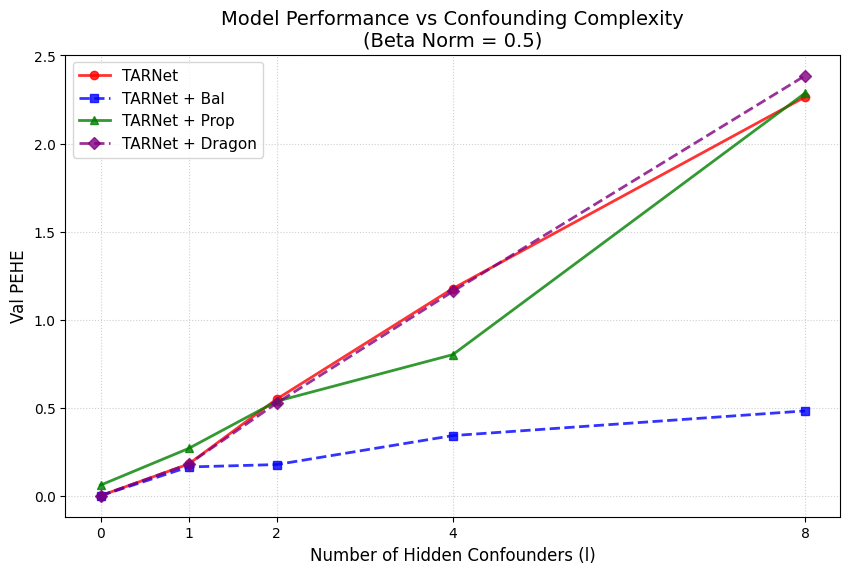

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_beta1.0.png


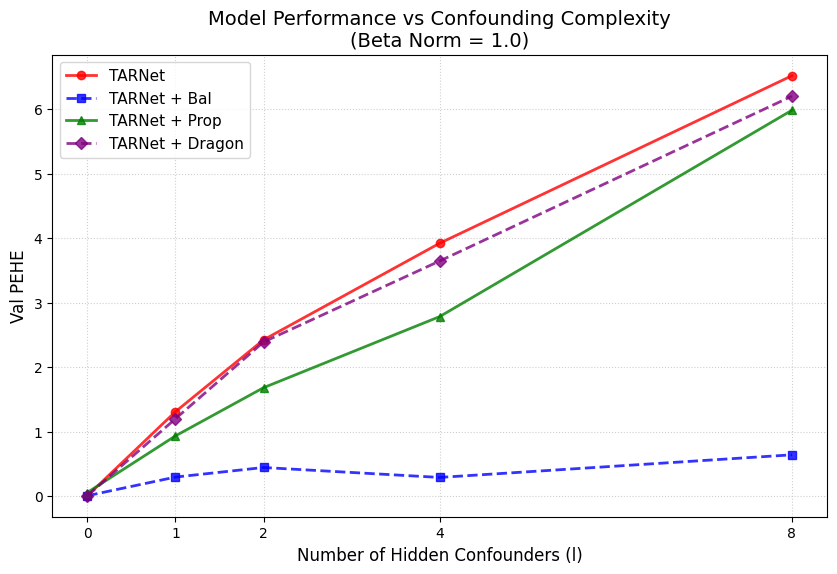

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_beta2.0.png


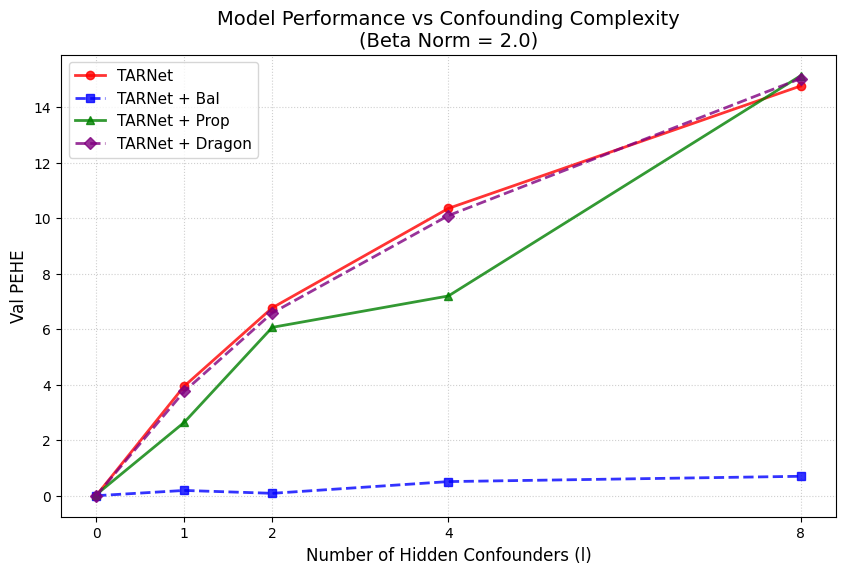

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_beta4.0.png


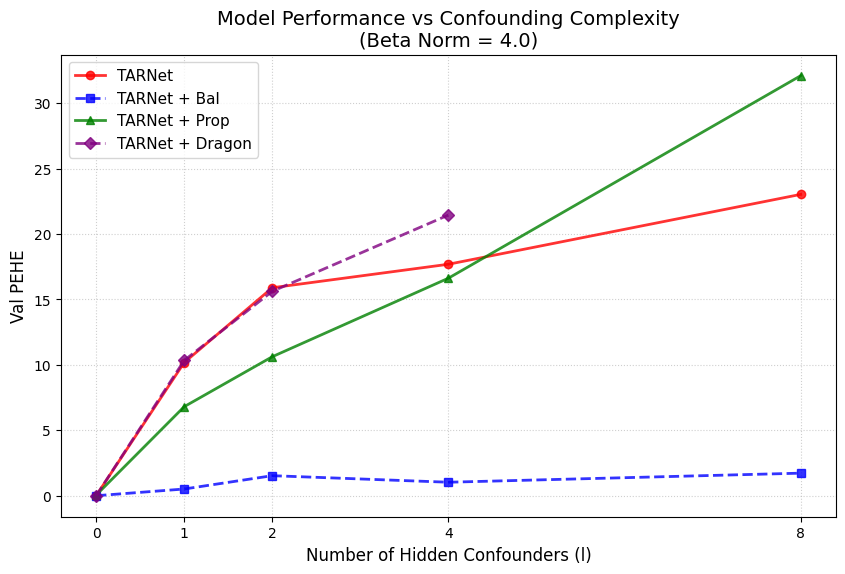

In [7]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# Plotting Configuration
# ============================================================

# Define the experiment parameters you used
BETA_LIST = [0.5, 1.0, 2.0, 4.0]
L_LIST = [0, 1, 2, 4, 8]  # Ensure this matches your trained l's

# Define the models to plot and their display styles
MODELS = {
    "baseline":       {"label": "TARNet",               "color": "red",    "marker": "o", "style": "-"},
    "baseline_bal":   {"label": "TARNet + Bal",         "color": "blue",   "marker": "s", "style": "--"},
    "propensity":     {"label": "TARNet + Prop",        "color": "green",  "marker": "^", "style": "-"},
    "dragonnet":      {"label": "TARNet + Dragon",      "color": "purple",  "marker": "D", "style": "--"},

    # "propensity_bal": {"label": "TARNet + Prop + Bal",  "color": "purple", "marker": "D", "style": "--"}
}

# Directory where metrics are saved (Same as in your main_train.py)
# RESULT_DIR is already defined in your script, but re-defining for standalone usage if needed
RESULT_DIR = "/content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results"

def plot_all_results():
    print(f"Generating plots for Betas: {BETA_LIST}...")

    # Create one figure for each beta_norm
    for beta in BETA_LIST:
        plt.figure(figsize=(10, 6))

        # Plot each model type
        for m_key, style in MODELS.items():
            l_values = []
            pehe_values = []

            for l in L_LIST:
                fname = f"metrics_{m_key}_beta{beta}_l{l}.json"
                fpath = os.path.join(RESULT_DIR, fname)

                if os.path.exists(fpath):
                    try:
                        with open(fpath, 'r') as f:
                            data = json.load(f)
                            # Use 'test_PEHE' or 'val_PEHE' as preferred
                            pehe = data.get("best_val_PEHE", np.nan)
                            if m_key == 'dragonnet':
                                pehe = data.get("val_PEHE", np.nan)

                            l_values.append(l)
                            pehe_values.append(pehe)
                    except Exception as e:
                        print(f"Error reading {fname}: {e}")
                else:
                    # Handle missing files (e.g. if training crashed or skipped)
                    print(f"Warning: Missing results for {fname}")

            # Only plot if we found data
            if len(l_values) > 0:
                plt.plot(l_values, pehe_values,
                         label=style["label"],
                         color=style["color"],
                         marker=style["marker"],
                         linestyle=style["style"],
                         linewidth=2,
                         alpha=0.8)

        # Formatting the figure
        plt.title(f"Model Performance vs Confounding Complexity\n(Beta Norm = {beta})", fontsize=14)
        plt.xlabel("Number of Hidden Confounders (l)", fontsize=12)
        plt.ylabel("Val PEHE", fontsize=12)
        plt.xticks(L_LIST)  # Force x-axis to show specific integer values
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.legend(fontsize=11)

        # Save or Show
        out_name = f"plot_pehe_beta{beta}.png"
        out_path = os.path.join(RESULT_DIR, out_name)
        plt.savefig(out_path, dpi=150)
        print(f"Saved plot to: {out_path}")
        plt.show() # Display inline if in notebook

if __name__ == "__main__":
    # Ensure RESULT_DIR is defined if running standalone
    if 'RESULT_DIR' not in globals():
        # Fallback path logic
        ROOT = "/content/drive/MyDrive/ECE 685/Project"
        USE_SEMI_SYNTH = False
        subdir = "experiments_semi_synthetic" if USE_SEMI_SYNTH else "experiments_synthetic"
        # RESULT_DIR = os.path.join(ROOT, subdir, "results", "run")

    plot_all_results()

Generating plots for Fixed L values: [0, 1, 2, 4, 8]...
Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_l0.png


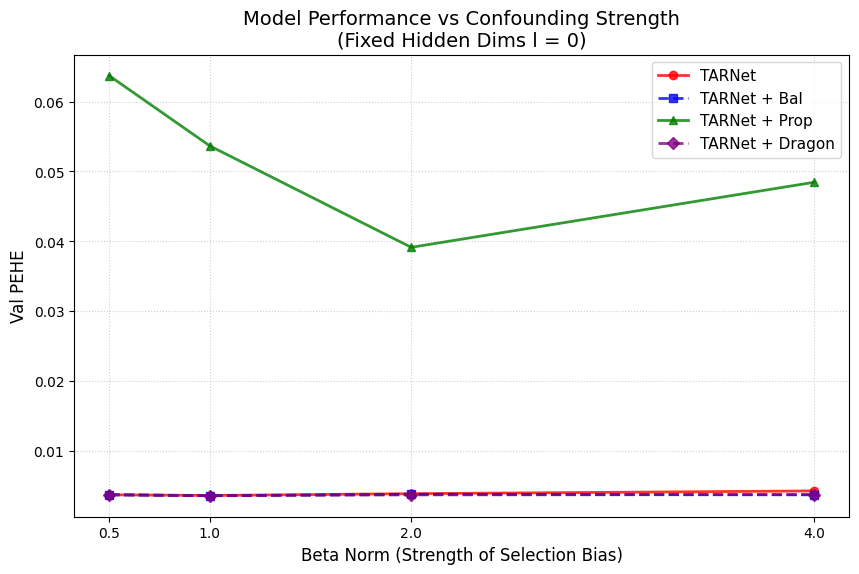

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_l1.png


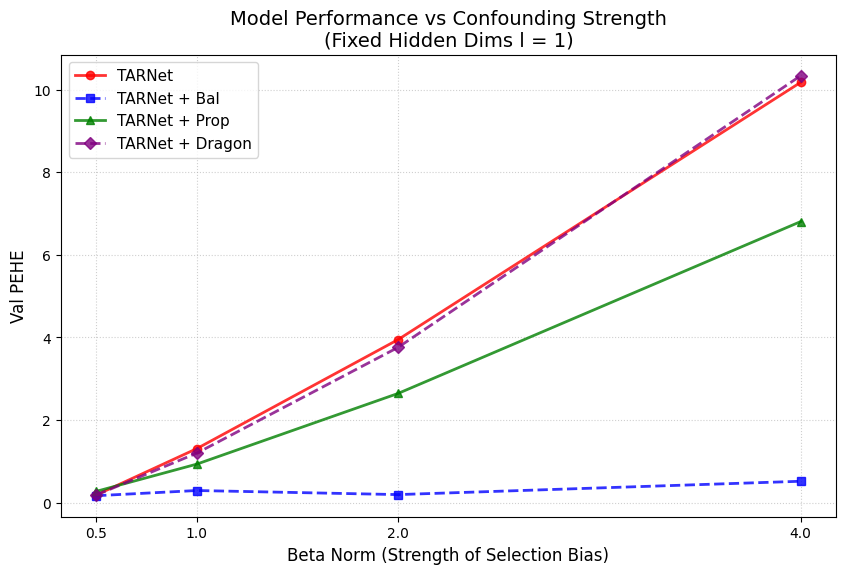

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_l2.png


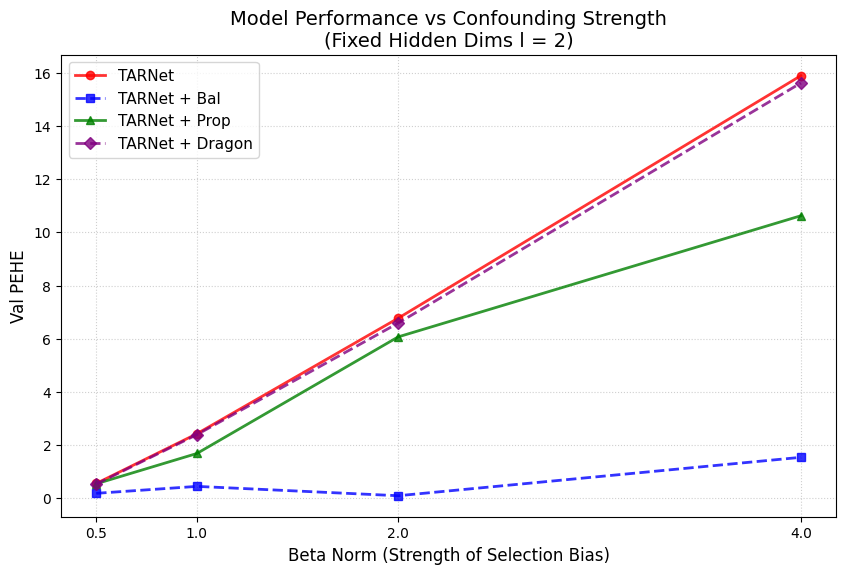

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_l4.png


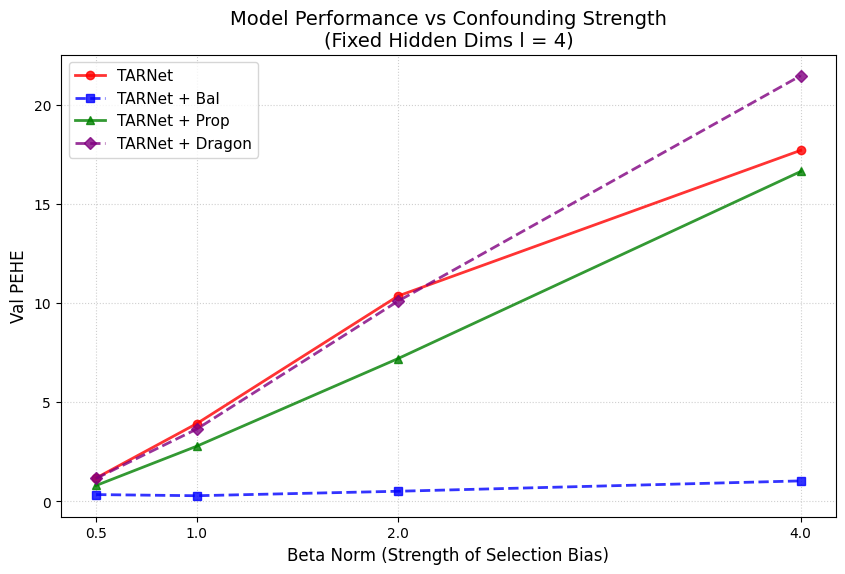

Saved plot to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/plot_pehe_l8.png


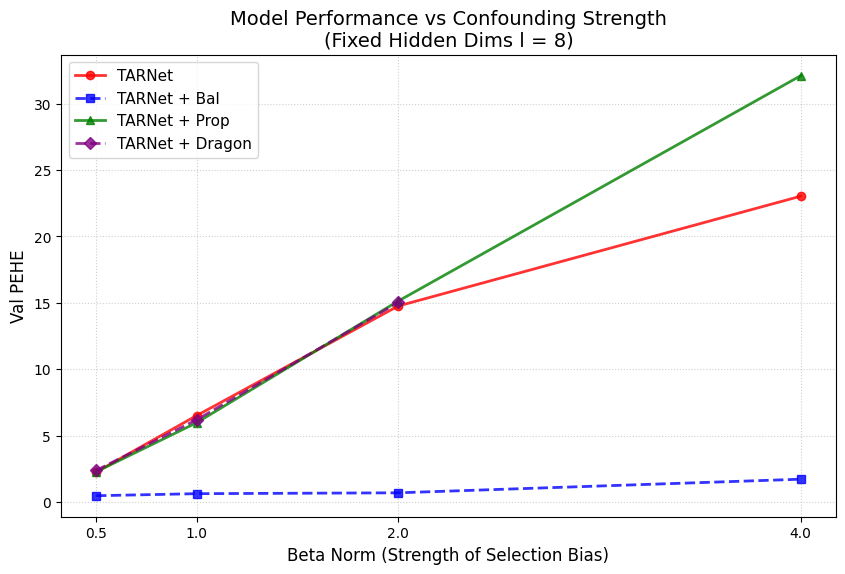

In [8]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

# ============================================================
# Plotting Configuration
# ============================================================

# Define the experiment parameters you used
BETA_LIST = [0.5, 1.0, 2.0, 4.0]
L_LIST = [0, 1, 2, 4, 8]  # Ensure this matches your trained l's

# Define the models to plot and their display styles
MODELS = {
    "baseline":       {"label": "TARNet",               "color": "red",    "marker": "o", "style": "-"},
    "baseline_bal":   {"label": "TARNet + Bal",         "color": "blue",   "marker": "s", "style": "--"},
    "propensity":     {"label": "TARNet + Prop",        "color": "green",  "marker": "^", "style": "-"},
    "dragonnet":      {"label": "TARNet + Dragon",      "color": "purple",  "marker": "D", "style": "--"},
    # "propensity_bal": {"label": "TARNet + Prop + Bal",  "color": "purple", "marker": "D", "style": "--"}
}

RESULT_DIR = "/content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results"

def plot_pehe_vs_beta():
    print(f"Generating plots for Fixed L values: {L_LIST}...")

    # --- SWAPPED LOOP: Create one figure for each l ---
    for l in L_LIST:
        plt.figure(figsize=(10, 6))

        # Plot each model type
        for m_key, style in MODELS.items():
            beta_values = []
            pehe_values = []

            # --- SWAPPED LOOP: Iterate over betas for the X-axis ---
            for beta in BETA_LIST:
                fname = f"metrics_{m_key}_beta{beta}_l{l}.json"
                fpath = os.path.join(RESULT_DIR, fname)

                if os.path.exists(fpath):
                    try:
                        with open(fpath, 'r') as f:
                            data = json.load(f)
                            # Use 'test_PEHE' or 'val_PEHE' as preferred
                            pehe = data.get("best_val_PEHE", np.nan)
                            if m_key == 'dragonnet':
                                pehe = data.get("val_PEHE", np.nan)

                            beta_values.append(beta)
                            pehe_values.append(pehe)
                    except Exception as e:
                        print(f"Error reading {fname}: {e}")
                else:
                    # Handle missing files
                    # print(f"Warning: Missing results for {fname}")
                    pass

            # Only plot if we found data
            if len(beta_values) > 0:
                plt.plot(beta_values, pehe_values,
                         label=style["label"],
                         color=style["color"],
                         marker=style["marker"],
                         linestyle=style["style"],
                         linewidth=2,
                         alpha=0.8)

        # Formatting the figure
        plt.title(f"Model Performance vs Confounding Strength\n(Fixed Hidden Dims l = {l})", fontsize=14)
        plt.xlabel("Beta Norm (Strength of Selection Bias)", fontsize=12)
        plt.ylabel("Val PEHE", fontsize=12)
        plt.xticks(BETA_LIST)  # Force x-axis to show specific beta values
        plt.grid(True, linestyle=':', alpha=0.6)
        plt.legend(fontsize=11)

        # Save or Show
        out_name = f"plot_pehe_l{l}.png"
        out_path = os.path.join(RESULT_DIR, out_name)
        plt.savefig(out_path, dpi=150)
        print(f"Saved plot to: {out_path}")
        plt.show() # Display inline if in notebook

if __name__ == "__main__":
    # Ensure RESULT_DIR is defined if running standalone
    if 'RESULT_DIR' not in globals():
        # Fallback path logic
        ROOT = "/content/drive/MyDrive/ECE 685/Project"
        USE_SEMI_SYNTH = False
        subdir = "experiments_semi_synthetic" if USE_SEMI_SYNTH else "experiments_synthetic"
        RESULT_DIR = os.path.join(ROOT, subdir, "results")

    plot_pehe_vs_beta()

In [9]:
import os
import json
import pandas as pd
import numpy as np

# ==========================================
# Config
# ==========================================
# Update this to match your project path where JSON files are located
RESULTS_DIR = "/content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results"
OUTPUT_CSV_FILE = os.path.join(RESULTS_DIR, "pehe_results_summary.csv")

# The experiment parameters you ran
BETA_LIST = [0.5, 1.0, 2.0, 4.0]
L_LIST = [0, 1, 2, 4, 8]

# Models to compare (Keys must match the 'model_type' used in your saved json files)
MODELS = [
    "baseline",
    "baseline_bal",
    "propensity",
    "dragonnet"
    # "propensity_bal" # Uncomment if you have this model
]

# ==========================================
# Data Extraction Logic
# ==========================================
def extract_pehe_data(results_dir, beta_list, l_list, models):
    """
    Reads JSON files and extracts PEHE values into a list of dictionaries.
    """
    data_records = []

    print(f"Reading results from: {results_dir}")

    for beta in beta_list:
        for l in l_list:
            for model_type in models:
                # Construct filename matching your naming convention
                fname = f"metrics_{model_type}_beta{beta}_l{l}.json"
                fpath = os.path.join(results_dir, fname)

                pehe_value = np.nan

                if os.path.exists(fpath):
                    try:
                        with open(fpath, 'r') as f:
                            results = json.load(f)

                        # Extract the appropriate metric based on model type
                        if model_type == 'dragonnet':
                            pehe_value = results.get("val_PEHE", np.nan)
                        else:
                            pehe_value = results.get("best_val_PEHE", np.nan)

                    except Exception as e:
                        print(f"Error reading {fname}: {e}")
                else:
                    # pass for missing files
                    pass

                # Append record
                data_records.append({
                    "Beta": beta,
                    "L": l,
                    "Model": model_type,
                    "PEHE": pehe_value
                })

    return data_records

# ==========================================
# Create CSV Summary
# ==========================================
def create_csv_summary(data_records, output_file):
    """
    Creates a Pandas DataFrame, pivots it, flattens the index, and saves to CSV.
    """
    if not data_records:
        print("No data found. Check your paths and filenames.")
        return

    df = pd.DataFrame(data_records)

    # Pivot Table: Rows = (Beta, L), Columns = Model, Values = PEHE
    pivot_df = df.pivot_table(index=["Beta", "L"], columns="Model", values="PEHE")

    # Round for readability
    pivot_df = pivot_df.round(4)

    # --- CRITICAL STEP ---
    # Reset index to flatten the MultiIndex.
    # This turns "Beta" and "L" into regular columns, ensuring Beta is repeated
    # on every row and removing the "multiple-row column" structure.
    flat_df = pivot_df.reset_index()

    print("\n--- Preview of Data ---")
    print(flat_df.head(10))

    # Save to CSV
    try:
        flat_df.to_csv(output_file, index=False)
        print(f"\nSuccessfully saved results to: {output_file}")
    except Exception as e:
        print(f"Error saving CSV: {e}")


# ==========================================
# Main Execution
# ==========================================
if __name__ == "__main__":
    # Check if directory exists
    if not os.path.exists(RESULTS_DIR):
        print(f"Error: Directory not found: {RESULTS_DIR}")
    else:
        records = extract_pehe_data(RESULTS_DIR, BETA_LIST, L_LIST, MODELS)
        create_csv_summary(records, OUTPUT_CSV_FILE)

Reading results from: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results

--- Preview of Data ---
Model  Beta  L  baseline  baseline_bal  dragonnet  propensity
0       0.5  0    0.0038        0.0038     0.0038      0.0637
1       0.5  1    0.1832        0.1668     0.1830      0.2717
2       0.5  2    0.5514        0.1804     0.5290      0.5392
3       0.5  4    1.1782        0.3446     1.1619      0.8036
4       0.5  8    2.2641        0.4846     2.3849      2.2860
5       1.0  0    0.0037        0.0036     0.0036      0.0536
6       1.0  1    1.3075        0.2930     1.1978      0.9323
7       1.0  2    2.4225        0.4418     2.3890      1.6801
8       1.0  4    3.9220        0.2875     3.6462      2.7834
9       1.0  8    6.5219        0.6386     6.2045      5.9859

Successfully saved results to: /content/drive/MyDrive/ECE 685/Project/experiments_synthetic/results/pehe_results_summary.csv
